In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [17]:
from bs4 import BeautifulSoup
import csv
f = open('land.kml', 'r')
soup=BeautifulSoup(f.read())
f.close()
csvfile = open('land.csv', 'wb')

spamwriter = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
for elem in soup.findAll('placemark'):
    for ele in elem.findAll('simpledata'):
        if ele.get('name').encode('utf-8') == '總價元':
            name =  int(ele.text)
    coordinates = elem.find('coordinates').text.split(',')
    lat = float(coordinates[0])
    lon = float(coordinates[1])
    spamwriter.writerow([name, lat, lon])
csvfile.close()

In [16]:
# -*- coding: utf-8 -*- 
from bs4 import BeautifulSoup
f = open('land.kml', 'r')
#print f.read()
soup = BeautifulSoup(f.read())
f.close()

for elem in soup.findAll('placemark'):
    price = None
    for ele in elem.findAll('simpledata'):
        if ele.get('name').encode('utf-8') == '總價元':
            price =  int(ele.text)
    print price, elem.find('coordinates').text


9600000 121.563767,24.99116199999999,0
55680000 121.5172395,25.03280820000001,0
6550000 121.517056,25.024019,0
6200000 121.5799269,24.9853235,0
36500000 121.5384923,25.00696350000002,0
7900000 121.574005,24.99142089999999,0
41500000 121.567786,24.988858,0
648541 0,0,0
216180 0,0,0
15600000 121.549915,24.99873300000004,0
8000000 121.564715,24.98288420000001,0
2000000 121.5638339,24.98227320000002,0
52000000 121.5851792,24.98638269999999,0
28770000 121.523052,25.02317579999998,0
8600000 121.5496953,25.0047471,0
32800000 121.561182,24.98547199999998,0
48000000 121.5192914,25.03823349999998,0
7370000 121.4988383,25.02566490000001,0
25000000 121.506849,25.04024100000001,0
24200000 121.5047081,25.04060739999999,0
57300000 121.511514,25.04534699999998,0
6800000 121.4938714,25.032055,0
10000000 121.571057,25.0818419,0
16200000 121.5251319,25.06531110000002,0
2200000 121.5873629,25.0879999,0
15640000 121.5768789,25.0542943,0
14390000 121.500497,25.041918,0
1500000 0,0,0
9900000 121.527082,25.04

In [20]:
# -*- coding: utf-8 -*- 
from bs4 import BeautifulSoup
import csv
f = open('parking1.xml', 'r')
#print f.read()
soup = BeautifulSoup(f.read())
f.close()
csvfile = open('parking.csv', 'wb')

spamwriter = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)

for elem in soup.findAll('park'):
    if elem.find('totalcar') is not None and\
           elem.find('xcod') is not None and \
            elem.find('ycod') is not None:
        spamwriter.writerow([ elem.find('id').text.encode('utf-8'), \
                  elem.find('summary').text.encode('utf-8'), \
                  elem.find('totalcar').text.encode('utf-8'), \
                elem.find('xcod').text.encode('utf-8'), \
                elem.find('ycod').text.encode('utf-8')])
csvfile.close()


In [21]:
dic = {'a':1, 'b':2, 'c':3}
print dic['b']

2


In [22]:
dic['d'] = 4
print dic

{'a': 1, 'c': 3, 'b': 2, 'd': 4}


In [23]:
dic['e']

KeyError: 'e'

In [27]:
print dic.get('e')
print dic.get('e', 'default')
print dic.get('d', 'default')

None
default
4


In [28]:
import math
 
def from_points(cell_size, points):
    hashmap = HashMap(cell_size)
    for point in points:
        dict_setdefault(hashmap.grid, hashmap.key(point),[]).append(point)
    return hashmap
 
def dict_setdefault(D, k, d):
    r = D.get(k,d)
    if k not in D:
        D[k] = d
    return r


In [29]:
class HashMap(object):
    def __init__(self, cell_size):
        self.cell_size = cell_size
        self.grid = {}
 
    def key(self, point):
        cell_size = self.cell_size
        return (
            int((math.floor(point[0]/cell_size))*cell_size),
            int((math.floor(point[1]/cell_size))*cell_size)
        )
 
    def insert(self, point):
        dict_setdefault( self.grid, self.key(point), []).append(point)
   
    def query(self, point):
        return dict_setdefault( self.grid, self.key(point), [])


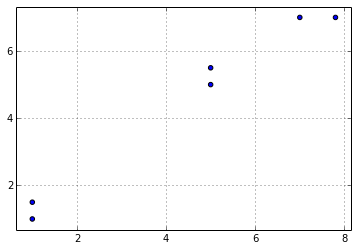

In [31]:
import matplotlib.pyplot as plt
import numpy

x = numpy.array([1,1,5,5,7,7.8])
y = numpy.array([1,1.5,5.5,5,7,7])

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0,12,2))
ax.set_yticks(numpy.arange(0,12,2))
plt.scatter(x,y)
plt.grid()
plt.show()


In [35]:
points = []

for i in range(0,len(x)):
    points.append((x[i], y[i]))

hashmap = from_points(2, points)
print hashmap.query((0.5,0.2))


[(1.0, 1.0), (1.0, 1.5)]


In [36]:
hashmap.insert((5,5.5))
print hashmap.query((5,5.2))

[(5.0, 5.5), (5.0, 5.0), (5, 5.5)]


In [37]:
print hashmap.query((5,1))

[]


In [38]:
from urllib import urlopen, urlencode
import json
address = "台北市敦化南路二段206號"
url = 'https://maps.googleapis.com/maps/api/geocode/json?' + urlencode([
        ('address', address),
        ('sensor', 'false'),
])
json = json.loads(urlopen(url).read())
#print json
print json['results'][0]['geometry']['location']['lat']

25.0224805


In [39]:
from urllib import urlopen, urlencode
from json import loads

def geocode(address):
    url = 'https://maps.googleapis.com/maps/api/geocode/json?' + urlencode([
        ('address', address),
        ('sensor', 'false'),
    ])
    json = loads(urlopen(url).read())
    result = json['results'][0]
    formattedAddress = result['formatted_address']
    location = result['geometry']['location']
    longitude, latitude = location['lng'], location['lat']
    return dict(address=formattedAddress, longitude=longitude, latitude=latitude)

def geocodeLL(address):
    valueByKey = geocode(address)
    return valueByKey['longitude'], valueByKey['latitude']


In [41]:
from pysal.cg.kdtree import Arc_KDTree
earthRadiusInMeters = 6378100

address = ["台北市敦化南路二段206號", "台北市復興北路一段13號", "小巨蛋", "台北101"]
pointsLL = []
for add in address:
    pointsLL.append(geocodeLL(add))
print pointsLL



[(121.5483674, 25.0224805), (121.5322985, 25.0463777), (121.549902, 25.0505355), (121.5644722, 25.0339639)]


In [43]:
from itertools import product, izip
k3 = Arc_KDTree(pointsLL, radius=earthRadiusInMeters)
distances, indices = k3.query(geocodeLL('台灣師範大學'), 1)
print "台灣師範大學 is %f meters away from %s"%(distances,address[indices])

台灣師範大學 is 2144.177287 meters away from 台北市敦化南路二段206號


In [44]:
import networkx as nx

G=nx.Graph()

G.add_edge('a','b',weight=32)
G.add_edge('a','f',weight=3)
G.add_edge('b','c',weight=21)
G.add_edge('b','e',weight=12)
G.add_edge('b','f',weight=7)
G.add_edge('c','e',weight=6)
G.add_edge('c','g',weight=11)
G.add_edge('c','f',weight=2)
G.add_edge('d','e',weight=13)
G.add_edge('d','g',weight=9)

# positions for all nodes
pos=nx.spring_layout(G) 

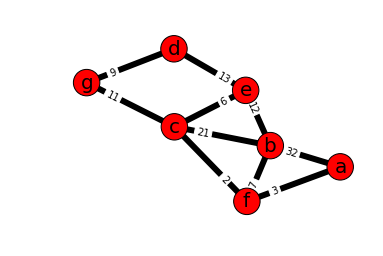

In [45]:
# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos, width=6)

# edge label
nx.draw_networkx_edge_labels(G,pos, 
    {
        ("a","b"):"32",("a","f"):"3", ("b","c"):"21", ("b","e"):"12",("b","f"):"7", ("c","e"):"6",\
        ("c","g"):"11", ("d","e"):"13", ("d","g"):"9", ("c","f"):"2"
    },
    label_pos=0.3
)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [46]:
nx.dijkstra_path(G, 'a', 'g', weight='weight')

['a', 'f', 'c', 'g']

In [47]:
nx.dijkstra_path_length(G, 'a', 'g', weight='weight')

16